# Análisis de contratación pública en el Ministerio de ambiente y desarrollo sostenible de Colombia

### Elaborado por Daniela Palencia y Juan David Moreno

### Universidad Externado de Colombia

### Seminario de Programación

## Introducción

En la búsqueda de generar clusters, la evaluación de la contratación pública se convierte en una herramienta esencial para comprender los patrones y tendencias presentes en las acciones del Ministerio de Ambiente y Desarrollo Sostenible de Colombia. El análisis de variables clave como el estado del contrato, el tipo y modalidad de contratación, entre otros, permite identificar agrupaciones significativas que arrojen luz sobre la eficiencia, transparencia y rendición de cuentas en las actividades gubernamentales relacionadas con el ámbito ambiental y de desarrollo sostenible.

El proceso se basa en la recopilación de datos del SECOP II, donde se almacena información crucial proporcionada por Colombia Compra Eficiente. Estos datos son fundamentales para formar clusters que permitan una evaluación profunda de la contratación realizada por el Ministerio, abordando aspectos como la justificación de modalidades de contratación, fechas relevantes, características de los proveedores y detalles financieros del contrato.

## Objetivo General:

El objetivo principal es generar clusters que reflejen la diversidad y complejidad de la contratación pública del Ministerio de Ambiente y Desarrollo Sostenible de Colombia. Estos clusters servirán como herramientas para identificar patrones, relaciones y áreas de mejora que promuevan la eficiencia y transparencia en la gestión de recursos, así como para fortalecer la rendición de cuentas en el ámbito ambiental y de desarrollo sostenible.

## Objetivos Específicos:

* Utilizar variables como el estado del contrato, tipo y modalidad de contratación, entre otros, para generar clusters que permitan analizar el cumplimiento y efectividad de las acciones contractuales del Ministerio.

* Identificar agrupaciones significativas que reflejen desviaciones presupuestarias, justificaciones de modalidades de contratación y otros aspectos relevantes para la gestión eficiente de recursos públicos.

* Explorar clusters relacionados con la distribución y destino del gasto, priorizando áreas de inversión que estén alineadas con los objetivos estratégicos del Ministerio en materia ambiental y de desarrollo sostenible.

* Analizar la relación entre las características de los proveedores, como su tipo y tamaño, y las condiciones contractuales, para identificar posibles patrones de comportamiento y mejorar la selección y gestión de proveedores.

* Evaluar la efectividad de las medidas de control y seguimiento, como la liquidación de contratos y el cumplimiento de obligaciones ambientales, mediante la identificación de clusters que destaquen los resultados y posibles áreas de mejora.

* Proponer recomendaciones específicas basadas en los hallazgos de los clusters, con el objetivo de optimizar los procesos de contratación, fortalecer la transparencia y mejorar la gestión de recursos públicos en el Ministerio de Ambiente y Desarrollo Sostenible de Colombia.


En primer lugar se cargan los paquetes requeridos para el análisis:

In [2]:
#pip install matplotlib seaborn
#pip install statsmodels

Se cargaran las librerias:

In [3]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sodapy import Socrata
import numpy as np
from scipy.stats import f_oneway
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


A continuación, se utiliza la biblioteca Sodapy en Python para acceder a datos abiertos en www.datos.gov.co. Inicia sesión en la plataforma, especifica el conjunto de datos deseado ("jbjy-vk9h"), y se realiza una consulta que selecciona registros con fecha de firma posterior a '2020-01-01' y NIT de la entidad igual a 830115395. Los datos se obtienen y se transforman en un DataFrame de Pandas para su análisis posterior en Python.

In [4]:
client = Socrata("www.datos.gov.co",
                 "Aorz3WwCwZXp3wMkpD09SiMLR",
                 username="daniela02.palencia@gmail.com", password="Sony1836")



socrata_dataset_identifier = "jbjy-vk9h"

Query = """
select
    *
where
    fecha_de_firma >= '2020-01-01'
    and
    nit_entidad=830115395
limit
140000000
"""

contratos_2020 = client.get(socrata_dataset_identifier, content_type="json", query=Query)

secopII_2020_DF = pd.DataFrame(pd.DataFrame.from_dict(contratos_2020))
secopII_2020_DF.head()

,nombre_entidad,nit_entidad,departamento,ciudad,localizaci_n,orden,sector,rama,entidad_centralizada,proceso_de_compra,...,recursos_de_credito,recursos_propios,codigo_entidad,codigo_proveedor,objeto_del_contrato,ultima_actualizacion,fecha_de_inicio_de_ejecucion,fecha_de_fin_de_ejecucion,fecha_inicio_liquidacion,fecha_fin_liquidacion
0,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.4078602,...,0,0,700209018,702956095,Prestar servicios profesionales a la Oficina A...,NaN,NaN,NaN,NaN,NaN
1,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.5388888,...,0,0,700209018,702993775,12-001 Prestar servicios profesionales para ap...,2024-01-26T00:00:00.000,NaN,NaN,NaN,NaN
2,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.2077650,...,0,10784809,700209018,703625459,"Aunar esfuerzos técnicos, administrativos y fi...",NaN,NaN,NaN,NaN,NaN
3,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.2707081,...,0,0,700209018,701881187,Prestación de servicios Profesionales a la Dir...,NaN,NaN,NaN,NaN,NaN
4,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.5536457,...,0,0,700209018,723112058,21-064 Prestar servicios profesionales a la Di...,NaN,NaN,NaN,NaN,NaN


Ahora se guarda el DataFrame secopII_2020_DF como un archivo CSV con el nombre "contratos2020.csv" en el directorio "../../Datos/Raw/". Además, estos datos son posteriormente leídos y cargados en un nuevo DataFrame llamado contratos_min_ambiente. Este proceso de guardado y carga proporciona una manera eficiente de preservar y trabajar con los datos obtenidos en futuras etapas de análisis o procesamiento.

In [5]:
secopII_2020_DF.to_csv('../../Datos/Raw/contratos2020.csv')
contratos_min_ambiente=pd.read_csv('../../Datos/Raw/contratos2020.csv')

Para iniciar el análisis, es fundamental obtener una comprensión detallada del contenido de la base de datos que será examinada. Esto implica la necesidad de conocer el nombre de las columnas que conforman dicha base de datos. 

In [6]:
print(contratos_min_ambiente.columns)

print("Número de columnas:", contratos_min_ambiente.shape[1])

Index(['Unnamed: 0', 'nombre_entidad', 'nit_entidad', 'departamento', 'ciudad',
       'localizaci_n', 'orden', 'sector', 'rama', 'entidad_centralizada',
       'proceso_de_compra', 'id_contrato', 'referencia_del_contrato',
       'estado_contrato', 'codigo_de_categoria_principal',
       'descripcion_del_proceso', 'tipo_de_contrato',
       'modalidad_de_contratacion', 'justificacion_modalidad_de',
       'fecha_de_firma', 'fecha_de_inicio_del_contrato',
       'fecha_de_fin_del_contrato', 'condiciones_de_entrega',
       'tipodocproveedor', 'documento_proveedor', 'proveedor_adjudicado',
       'es_grupo', 'es_pyme', 'habilita_pago_adelantado', 'liquidaci_n',
       'obligaci_n_ambiental', 'obligaciones_postconsumo', 'reversion',
       'origen_de_los_recursos', 'destino_gasto', 'valor_del_contrato',
       'valor_de_pago_adelantado', 'valor_facturado',
       'valor_pendiente_de_pago', 'valor_pagado', 'valor_amortizado',
       'valor_pendiente_de', 'valor_pendiente_de_ejecucion', 'e

Con esta información se puede observar de mejor manera que columnas son de interés provechoso para el análisis y se procede a filtrar de mejor manera la base: 

Con esta información, es posible examinar de manera más detallada qué columnas resultan ser de interés y beneficio para el análisis en curso. Este conocimiento facilita un filtrado más preciso y eficiente de la base de datos, permitiendo concentrar la atención en los atributos específicos que contribuirán de manera significativa al análisis que se está llevando a cabo.

In [7]:
#Seleccion de columnas 
Base_filtrada = pd.concat([
    contratos_min_ambiente.loc[:, 'id_contrato':'valor_del_contrato']
], axis=1)
columnas_eliminar = ["referencia_del_contrato","codigo_de_categoria_principal", "descripcion_del_proceso", "condiciones_de_entrega", "documento_proveedor"]
Base_filtrada = Base_filtrada.drop(columnas_eliminar, axis=1)
Base_filtrada['id_contrato'] = Base_filtrada['id_contrato'].str.replace('CO1.PCCNTR.', '')
Base_filtrada['id_contrato'] = pd.to_numeric(Base_filtrada['id_contrato'], errors='coerce')
Base_filtrada.to_csv('../../Datos/Raw/base_recortada_contratos.csv', index=True)
Data=pd.read_csv('../../Datos/Raw/base_recortada_contratos.csv')
Base_filtrada.head()


,id_contrato,estado_contrato,tipo_de_contrato,modalidad_de_contratacion,justificacion_modalidad_de,fecha_de_firma,fecha_de_inicio_del_contrato,fecha_de_fin_del_contrato,tipodocproveedor,proveedor_adjudicado,es_grupo,es_pyme,habilita_pago_adelantado,liquidaci_n,obligaci_n_ambiental,obligaciones_postconsumo,reversion,origen_de_los_recursos,destino_gasto,valor_del_contrato
0,4696608,En ejecución,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2023-02-27T00:00:00.000,2023-03-01T00:00:00.000,2024-07-01T00:00:00.000,Cédula de Ciudadanía,Dineida,No,No,No,No,No,No,No,No Definido,Funcionamiento,124000000
1,5719533,Modificado,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2024-01-09T00:00:00.000,2024-01-10T00:00:00.000,2024-12-31T00:00:00.000,Cédula de Ciudadanía,BEATRIZ RINCON NIETO,No,No,No,No,No,No,No,No Definido,Inversión,117000000
2,2647985,En ejecución,Otro,Contratación directa,Contratos o convenios Interadministrativos (va...,2021-07-13T00:00:00.000,2021-07-14T00:00:00.000,2021-11-12T00:00:00.000,No Definido,INSTITUTO DE INVESTIGACIONES MARINAS Y COSTERA...,No,No,No,No,No,No,No,No Definido,Inversión,50784809
3,3423229,En ejecución,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2022-01-26T00:00:00.000,2022-01-26T00:00:00.000,2022-12-26T00:00:00.000,Cédula de Ciudadanía,Jorge Ivan Ramirez,No,No,No,No,No,No,No,No Definido,Inversión,71500000
4,5849002,En ejecución,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2024-02-01T00:00:00.000,2024-02-06T00:00:00.000,2024-12-06T00:00:00.000,Cédula de Ciudadanía,John Fredy Botero,No,No,No,No,No,No,No,No Definido,Inversión,68250000


In [8]:
print(Base_filtrada.columns)

Index(['id_contrato', 'estado_contrato', 'tipo_de_contrato',
       'modalidad_de_contratacion', 'justificacion_modalidad_de',
       'fecha_de_firma', 'fecha_de_inicio_del_contrato',
       'fecha_de_fin_del_contrato', 'tipodocproveedor', 'proveedor_adjudicado',
       'es_grupo', 'es_pyme', 'habilita_pago_adelantado', 'liquidaci_n',
       'obligaci_n_ambiental', 'obligaciones_postconsumo', 'reversion',
       'origen_de_los_recursos', 'destino_gasto', 'valor_del_contrato'],
      dtype='object')


Se identifica el tamaño de la nueva base de datos y si hay datos faltantes: 

In [9]:
filas, columnas = Base_filtrada.shape

# Para conocer el numero de filas y columnas de la base filtrada
print(f'Número de filas: {filas}')
print(f'Número de columnas: {columnas}')

Número de filas: 5006
Número de columnas: 20


In [10]:
# Se configura la visualización para mostrar todas las columnas
pd.set_option('display.max.columns', None)
nan_count = Base_filtrada.isna().sum()

print("Número de NaN por columna:")
print(nan_count)

Número de NaN por columna:
id_contrato                      0
estado_contrato                  0
tipo_de_contrato                 0
modalidad_de_contratacion        0
justificacion_modalidad_de       0
fecha_de_firma                   0
fecha_de_inicio_del_contrato    35
fecha_de_fin_del_contrato        0
tipodocproveedor                 0
proveedor_adjudicado             0
es_grupo                         0
es_pyme                          0
habilita_pago_adelantado         0
liquidaci_n                      0
obligaci_n_ambiental             0
obligaciones_postconsumo         0
reversion                        0
origen_de_los_recursos           0
destino_gasto                    0
valor_del_contrato               0
dtype: int64


De lo anterior se destaca que, de las columnas seleccionadas para el análisis, únicamente la columna que almacena información sobre la Fecha de Inicio del Contrato presenta tres valores faltantes, los cuales equivalen al 0.07% de todas las filas, por lo que se eliminaran estas observaciones de la base de datos para tener una base completa. A continuación, se procederá a elaborar el análisis correspondiente a las columnas seleccionadas de interés y se implementarán estrategias adecuadas para abordar la gestión de los valores faltantes en la mencionada columna. 

In [11]:
Base_filtrada = Base_filtrada.dropna()

In [12]:
valores_nulos = Base_filtrada.isna()
hay_Na = valores_nulos.any().any()
print("Hay valores nulos en la base de datos?", hay_Na)

Hay valores nulos en la base de datos? False


Dado que ya no hay valores nulos se seguirá con el análisis de los datos.

## Arreglo de las Variables:

Se corregira en dado caso que sea necesario el tipo de variable, para iniciar el analsis descriptivo de las variables

In [13]:
print(Base_filtrada.dtypes)

id_contrato                      int64
estado_contrato                 object
tipo_de_contrato                object
modalidad_de_contratacion       object
justificacion_modalidad_de      object
fecha_de_firma                  object
fecha_de_inicio_del_contrato    object
fecha_de_fin_del_contrato       object
tipodocproveedor                object
proveedor_adjudicado            object
es_grupo                        object
es_pyme                         object
habilita_pago_adelantado        object
liquidaci_n                     object
obligaci_n_ambiental            object
obligaciones_postconsumo        object
reversion                       object
origen_de_los_recursos          object
destino_gasto                   object
valor_del_contrato               int64
dtype: object


In [14]:
categoricas = ['estado_contrato', 'tipo_de_contrato', 'modalidad_de_contratacion', 'es_grupo', 'es_pyme', 'habilita_pago_adelantado', 'justificacion_modalidad_de', 'tipodocproveedor', 'proveedor_adjudicado', 'es_grupo', 'es_pyme', 'habilita_pago_adelantado', 'liquidaci_n', 'obligaci_n_ambiental', 'obligaciones_postconsumo', 'reversion', 'origen_de_los_recursos', 'destino_gasto']

numericas = ['valor_del_contrato', "id_contrato"]


for columna in categoricas:
    Base_filtrada[columna] = Base_filtrada[columna].astype('category')


Base_filtrada['valor_del_contrato'] = Base_filtrada['valor_del_contrato'].astype(str).str.replace(',', '').astype(float)

## Analisis Descriptivo

Estado de Contrato:
                 Frecuencia  Porcentaje
estado_contrato                        
En ejecución           2509       50.47
Modificado             1817       36.55
terminado               300        6.04
Cerrado                 152        3.06
Activo                  146        2.94
cedido                   45        0.91
Suspendido                2        0.04


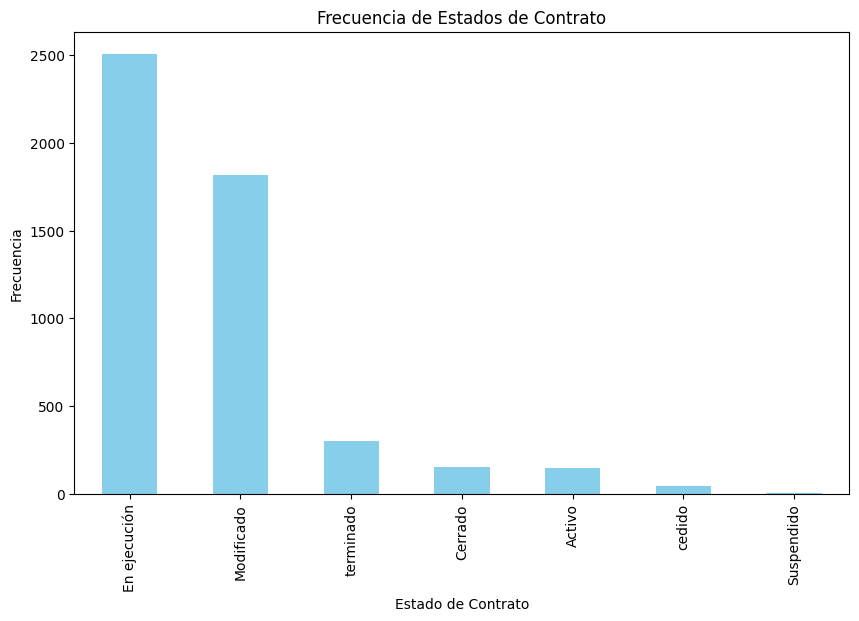


Número de tipos de contrato: 10

Frecuencia de cada tipo de contrato:
tipo_de_contrato
Prestación de servicios    4785
Otro                        112
No Especificado              29
Suministros                  14
Compraventa                  12
Seguros                       6
Decreto 092 de 2017           5
Consultoría                   4
Obra                          3
Negocio fiduciario            1
Name: count, dtype: int64

Número de modalidades de contratación: 11

Frecuencia de cada modalidad de contratación:
modalidad_de_contratacion
Contratación directa                                           4756
No Definido                                                      99
Mínima cuantía                                                   46
Selección abreviada subasta inversa                              23
Selección Abreviada de Menor Cuantía                             17
Contratación régimen especial                                    16
Licitación pública                        

In [15]:
estado_contrato_data = Base_filtrada['estado_contrato'].value_counts()
estado_contrato_porcentajes = Base_filtrada['estado_contrato'].value_counts(normalize=True) * 100
estado_contrato_porcentajes = estado_contrato_porcentajes.round(2)
estado_contrato_df = pd.DataFrame({'Frecuencia': estado_contrato_data, 'Porcentaje': estado_contrato_porcentajes})

print("Estado de Contrato:")
print(estado_contrato_df)

estado_contrato_data.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Frecuencia de Estados de Contrato')
plt.xlabel('Estado de Contrato')
plt.ylabel('Frecuencia')
plt.show()

tipos_contrato_frecuencias = Base_filtrada['tipo_de_contrato'].value_counts()
print(f"\nNúmero de tipos de contrato: {len(tipos_contrato_frecuencias)}")
print("\nFrecuencia de cada tipo de contrato:")
print(tipos_contrato_frecuencias)

modalidades_contratacion_frecuencias = Base_filtrada['modalidad_de_contratacion'].value_counts()
print(f"\nNúmero de modalidades de contratación: {len(modalidades_contratacion_frecuencias)}")
print("\nFrecuencia de cada modalidad de contratación:")
print(modalidades_contratacion_frecuencias)


El análisis unificado de las frecuencias de estados de contrato, tipos de contrato y modalidades de contratación proporciona una visión comprehensiva de las prácticas de contratación en el Ministerio de Ambiente y Desarrollo Sostenible. A continuación, se presentan los resultados clave:

Estado de Contrato:
La frecuencia de cada estado de contrato proporciona una visión clara de cómo se distribuyen los contratos en diferentes etapas de ejecución. La abrumadora prevalencia de "Contratación directa" con 3746 contratos sugiere una estrategia dominante de abordar procesos contractuales de manera directa, posiblemente para agilizar y simplificar la ejecución. Aunque otras categorías como "Mínima cuantía" y "Selección abreviada subasta inversa" tienen frecuencias más bajas, su presencia indica la aplicación de diferentes enfoques en situaciones específicas.

Tipos de Contrato:
La identificación de la "Prestación de servicios" como el tipo de contrato más frecuente, con 3707 contratos, resalta la importancia de esta actividad en los proyectos del Ministerio. Las otras categorías de tipos de contrato, aunque menos frecuentes, pueden tener implicaciones particulares y requerir consideraciones específicas en términos de gestión y ejecución.

Modalidades de Contratación:
La preeminencia de la "Contratación directa" con 3746 contratos indica una preferencia por este enfoque, posiblemente motivada por la flexibilidad que ofrece. Aunque modalidades como "Mínima cuantía" y "Selección abreviada subasta inversa" tienen frecuencias más bajas, su presencia sugiere una variedad de enfoques para abordar diferentes tipos de proyectos. La diversificación en modalidades especiales, como "Concurso de méritos abierto" y "Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes", destaca la adaptabilidad en la elección de métodos, indicando una respuesta específica a la complejidad y naturaleza única de ciertos proyectos. .

Frecuencias de todas las justificaciones de modalidad de contratación:
justificacion_modalidad_de
Servicios profesionales y apoyo a la gestión                                                  4694
Contratos o convenios Interadministrativos (valor cero)                                        102
No Definido                                                                                     60
Presupuesto inferior al 10% de la menor cuantía                                                 47
No existe pluralidad de oferentes en el mercado                                                 28
Suministro de bienes y servicios de características técnicas uniformes y común utilización      23
Regla aplicable                                                                                 13
Presupuesto menor al 10% de la Menor Cuantía                                                    13
Ley 1150 de 2007                                                                                10
Decreto 092

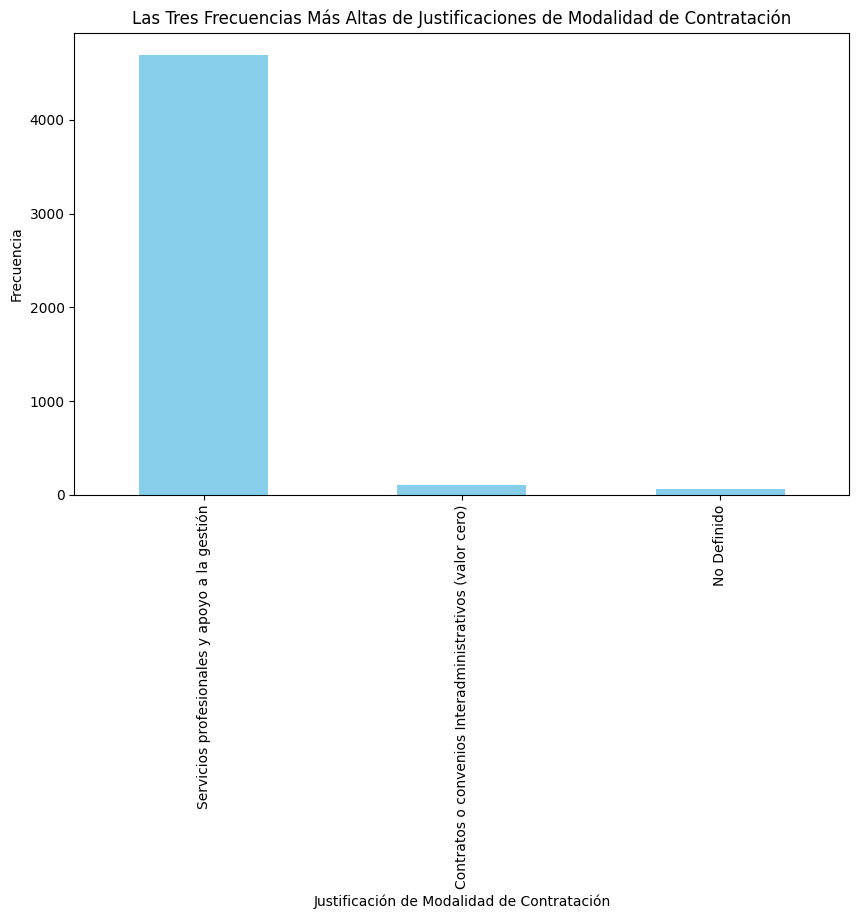

In [16]:
justificaciones_modalidad_frecuencias = contratos_min_ambiente['justificacion_modalidad_de'].value_counts()
print("Frecuencias de todas las justificaciones de modalidad de contratación:")
print(justificaciones_modalidad_frecuencias)

top_justificaciones = justificaciones_modalidad_frecuencias.head(3)

plt.figure(figsize=(10, 6))
top_justificaciones.plot(kind='bar', color='skyblue')
plt.title('Las Tres Frecuencias Más Altas de Justificaciones de Modalidad de Contratación')
plt.xlabel('Justificación de Modalidad de Contratación')
plt.ylabel('Frecuencia')
plt.show()


El análisis de las justificaciones de modalidad de contratación proporciona una visión detallada de las razones detrás de la elección de ciertos métodos de contratación en el Ministerio de Ambiente y Desarrollo Sostenible. Destacan tres categorías con las frecuencias más altas:

Servicios Profesionales y Apoyo a la Gestión (3615 contratos):

Esta justificación lidera con una frecuencia considerable, indicando que el Ministerio frecuentemente recurre a servicios profesionales y apoyo a la gestión en sus contratos. Esto podría reflejar la necesidad de experiencia especializada para llevar a cabo proyectos y tareas específicas.
Contratos o Convenios Interadministrativos (Valor Cero) (100 contratos):

La justificación de contratos o convenios interadministrativos con valor cero tiene una frecuencia significativa, señalando la existencia de acuerdos colaborativos entre diferentes entidades gubernamentales. Esta práctica puede ser común para compartir recursos o conocimientos sin intercambio financiero directo.
Presupuesto Inferior al 10% de la Menor Cuantía (46 contratos):

La selección de esta modalidad debido a un presupuesto inferior al 10% de la menor cuantía es otra justificación utilizada con regularidad. Esto puede indicar una preferencia por este enfoque en situaciones donde el presupuesto disponible es relativamente bajo en comparación con la menor cuantía establecida.
Las restantes justificaciones, aunque menos frecuentes, incluyen razones como la falta de pluralidad de oferentes en el mercado, cumplimiento de normativas específicas (como la Ley 1150 de 2007 o el Decreto 092 de 2017), urgencia manifiesta, entre otras. 

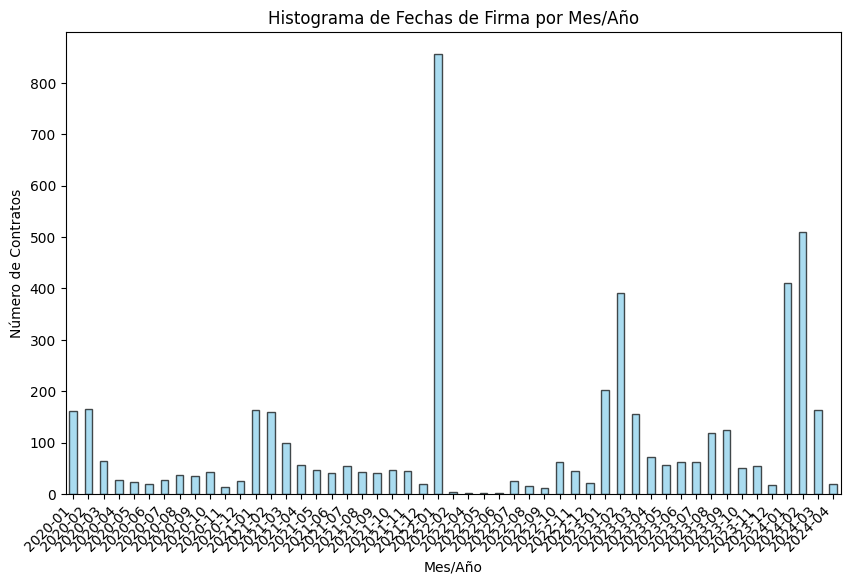

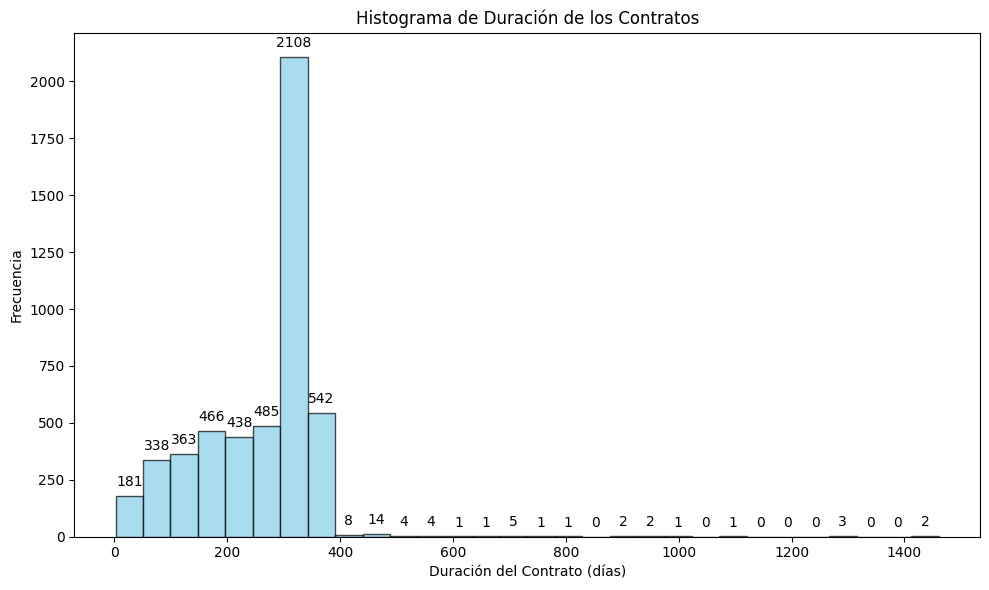

In [17]:

Base_filtrada['fecha_de_firma'] = pd.to_datetime(Base_filtrada['fecha_de_firma'])
Base_filtrada['fecha_de_inicio_del_contrato'] = pd.to_datetime(Base_filtrada['fecha_de_inicio_del_contrato'])
Base_filtrada['fecha_de_fin_del_contrato'] = pd.to_datetime(Base_filtrada['fecha_de_fin_del_contrato'])

Base_filtrada['mes_anio'] = Base_filtrada['fecha_de_firma'].dt.to_period("M")
Base_filtrada['duracion_del_contrato'] = (Base_filtrada['fecha_de_fin_del_contrato'] - Base_filtrada['fecha_de_inicio_del_contrato']).dt.days

# Se crea un histograma con las fechas de firma por mes/año
Base_filtrada['mes_anio'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7, figsize=(10, 6))
plt.title('Histograma de Fechas de Firma por Mes/Año')
plt.xlabel('Mes/Año')
plt.ylabel('Número de Contratos')
plt.xticks(rotation=45, ha='right')

# Se crea un histograma de duración de los contratos con frecuencia encima de las barras
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)
Base_filtrada['duracion_del_contrato'].hist(bins=30, color='skyblue', edgecolor='black', alpha=0.7, ax=ax, grid=False)
plt.title('Histograma de Duración de los Contratos')
plt.xlabel('Duración del Contrato (días)')
plt.ylabel('Frecuencia')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


Las gráficas revelan patrones notables en la firma de contratos durante el periodo de 2020 a 2023. Se destaca que los dos primeros meses de cada año concentran el mayor número de contratos. En enero y febrero de 2020 se firmaron alrededor de 180 contratos cada mes, manteniéndose una cifra similar en 2021. Sin embargo, en enero de 2022 se experimentó un notable incremento, superando los 800 contratos. En contraste, para 2023, la cantidad de contratos firmados en el primer mes del año se redujo casi a la mitad.

Esta variación en la cantidad de contratos podría vincularse con las estrategias gubernamentales de reactivación económica implementadas a principios de 2022, tras dos años de pandemia que posiblemente ralentizaron la contratación pública. Se observa que los meses con menor actividad contractual son los últimos del año, con la excepción del segundo cuatrimestre de 2022, donde se evidencia una marcada disminución en la firma de contratos. Estos hallazgos sugieren una dinámica estacional y posiblemente reflejen cambios en las prioridades y enfoques del gobierno en respuesta a condiciones económicas y de salud pública cambiantes.

A partir del segundo gráfico, se puede realizar un análisis detallado del periodo evaluado (2020-2023) en la base de datos. Se destaca que se identificaron más de 1,300 contratos con una duración de 1,390 días, siendo este el periodo más extenso registrado para un contrato. Asimismo, se observa que el rango más frecuente de duración para los contratos se sitúa entre 181 y 431 días. Es notable que la duración de contratos inferiores a 50 días es bastante poco frecuente, indicando una tendencia a acuerdos de mediano a largo plazo en la contratación evaluada. 

In [18]:
frecuencias_tipodocproveedor = Base_filtrada['tipodocproveedor'].value_counts()
print("Frecuencias de contratos por tipo de documento del proveedor:")
print(frecuencias_tipodocproveedor)

Frecuencias de contratos por tipo de documento del proveedor:
tipodocproveedor
Cédula de Ciudadanía     4679
No Definido               276
Sin Descripcion             8
Cédula de Extranjería       6
Tarjeta de Identidad        2
Name: count, dtype: int64



El análisis detallado de los tipos de documento utilizados por los proveedores en los contratos del Ministerio de Ambiente y Desarrollo Sostenible revela patrones notables en la identificación de los proveedores. En primer lugar, la mayoría de los contratos están vinculados a proveedores que emplean la Cédula de Ciudadanía como documento principal, consolidándose como la opción preponderante. Además, la presencia de un número significativo de contratos con el tipo de documento no definido sugiere posibles inconsistencias o falta de información en algunas entradas.

Es particularmente intrigante observar que dos contratos están asociados a proveedores que utilizan la Tarjeta de Identidad como documento de identificación. Este hallazgo es excepcional, ya que la Tarjeta de Identidad suele ser un documento utilizado por individuos menores de edad. Este aspecto merece una investigación más profunda para comprender las circunstancias específicas que llevaron a esta situación inusual.

Asimismo, llama la atención la escasa representación de proveedores con Cédula de Extranjería, limitándose a solo seis casos. Este fenómeno podría sugerir restricciones en la participación de proveedores extranjeros en ciertos tipos de contratos o reflejar la predominancia de proveedores nacionales en las transacciones de contratación del Ministerio.

In [19]:
contratos_por_proveedor = Base_filtrada['proveedor_adjudicado'].value_counts()
proveedores_con_mas_de_dos_contratos = contratos_por_proveedor[contratos_por_proveedor > 2]
print("Proveedores con más de dos contratos adjudicados:")
print(proveedores_con_mas_de_dos_contratos)


Proveedores con más de dos contratos adjudicados:
proveedor_adjudicado
Ministerio de Ambiente y Desarrollo Sostenible                                  14
INSTITUTO DE INVESTIGACION DE RECURSOS BIOLOGICOS ALEXANDER VON HUMBOLDT        10
PROGRAMA DE LAS NACIONES UNIDAS PARA EL DESARROLLO PNUD                          9
INSTITUTO DE INVESTIGACIONES MARINAS Y COSTERAS JOSE BENITO VIVES DE ANDREIS     8
Camilo Ernesto Castillo Neva                                                     7
                                                                                ..
ANDRES GIOVANNY CADENA HERRERA                                                   3
ALBA LUCIA MONTAÑEZ PEREZ                                                        3
MONICA YULIET GOMEZ SILVA                                                        3
Johanna Alexandra Ruiz Hernandez                                                 3
BIBIANA ANDREA CASAS SIERRA                                                      3
Name: count, Len

El análisis detallado de los proveedores que han sido adjudicatarios en más de dos contratos con el Ministerio de Ambiente y Desarrollo Sostenible revela una diversidad significativa en las entidades y actores involucrados en la ejecución de proyectos. En primer lugar, el propio Ministerio emerge como un adjudicatario frecuente, sugiriendo la posibilidad de contratos internos o interinstitucionales. Destacan instituciones especializadas como el INSTITUTO DE INVESTIGACION DE RECURSOS BIOLOGICOS ALEXANDER VON HUMBOLDT, evidenciando la importancia de la investigación de recursos biológicos en los proyectos ministeriales. Asimismo, la presencia del PROGRAMA DE LAS NACIONES UNIDAS PARA EL DESARROLLO PNUD indica colaboraciones internacionales en áreas relacionadas con el desarrollo sostenible y el medio ambiente. Otro actor clave es el INSTITUTO DE INVESTIGACIONES MARINAS Y COSTERAS JOSE BENITO VIVES DE ANDREIS, resaltando la relevancia de los estudios marinos y costeros en las iniciativas ministeriales. 

Además, proveedores individuales como Nicolly Daniela Sánchez Valcarcel, junto con otros como Consuelo Gauta Gómez, Jorge Eliécer Portela Paipa, Kelly Joletti Moreno Fontalvo, Laura Cristina Morales Giraldo y Kevin Alexander Alvarado Burgos, desempeñan roles importantes al ser adjudicatarios en varios contratos, sugiriendo posibles relaciones continuas y acuerdos a largo plazo. En conclusión, este análisis subraya la estrategia de colaboración diversa del Ministerio y la importancia de contar con proveedores especializados para la implementación exitosa de sus proyectos.

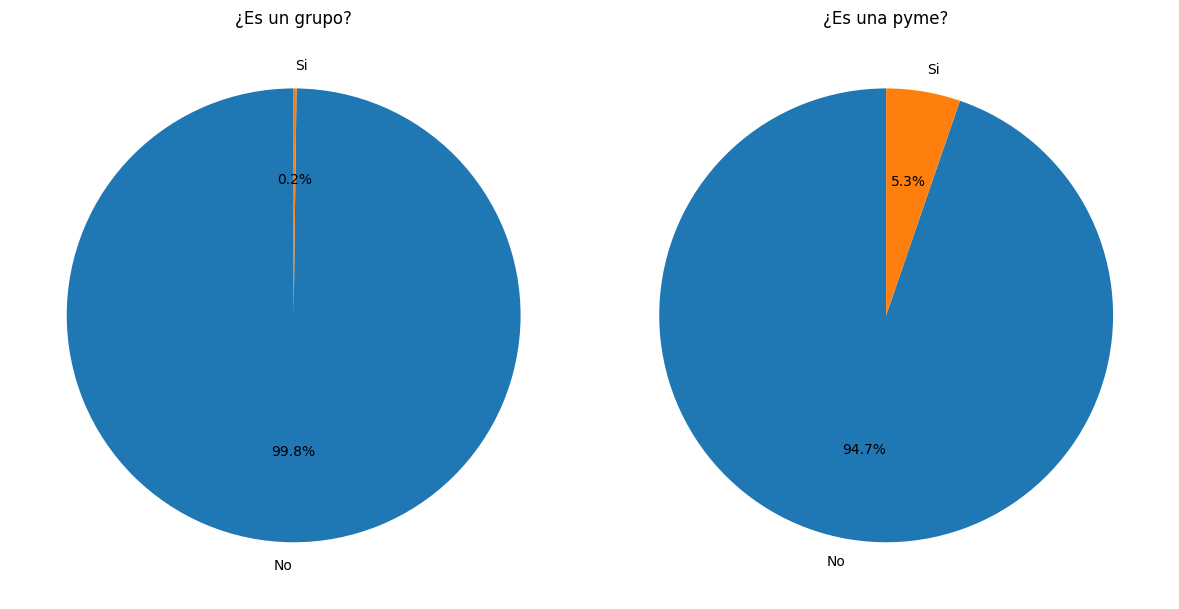

Tabla de Frecuencias:
    Es un grupo  Es una pyme
No         4961         4709
Si           10          262


In [20]:
frecuencias_grupo = Base_filtrada['es_grupo'].value_counts()
frecuencias_pyme = Base_filtrada['es_pyme'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(frecuencias_grupo, labels=frecuencias_grupo.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('¿Es un grupo?')

ax2.pie(frecuencias_pyme, labels=frecuencias_pyme.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('¿Es una pyme?')

plt.tight_layout()
plt.show()

tabla_frecuencias = pd.DataFrame({
    'Es un grupo': frecuencias_grupo,
    'Es una pyme': frecuencias_pyme
})

print("Tabla de Frecuencias:")
print(tabla_frecuencias)

Los anteriores gráficos revelan detalles significativos sobre la distribución de los contratos en la base de datos filtrada en función de las categorías "es_grupo" y "es_pyme". En relación con la condición de ser un grupo, se destaca que la abrumadora mayoría de los contratos, específicamente 3854 de ellos, corresponden a entidades contratantes que no son consideradas grupos. En contraste, solo se identificaron 7 contratos asociados a entidades que cumplen con la condición de ser un grupo. Respecto a la condición de ser una pequeña o mediana empresa (PYME), se observa que 3626 contratos no están vinculados a PYME, mientras que 235 contratos sí se adjudicaron a este tipo de entidades.

Estos resultados sugieren que, en este conjunto de datos, las entidades individuales no consideradas como grupos son predominantes como adjudicatarias de contratos. La presencia limitada de contratos asociados a grupos indica que, en términos generales, las entidades individuales son más frecuentes en comparación con las entidades que cumplen con la condición de ser grupos. Además, la mayoría de los contratos no están vinculados a PYME, subrayando la importancia de entender la diversidad de las entidades adjudicatarias en el contexto de la contratación pública.

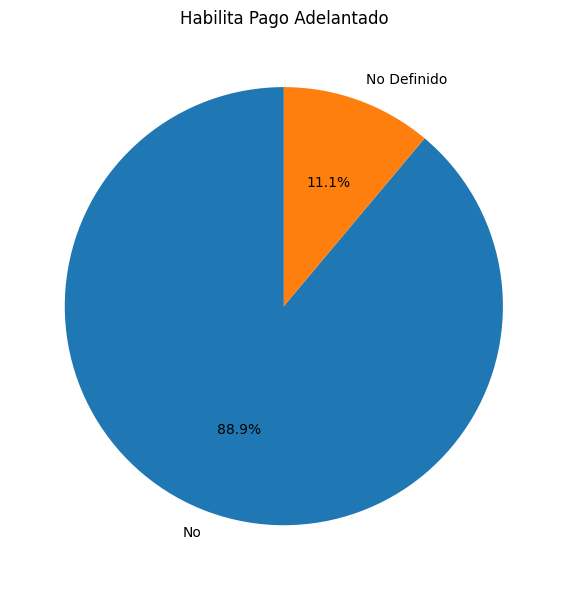

Tabla de Frecuencias:
                          Habilita Pago Adelantado
habilita_pago_adelantado                          
No                                            4419
No Definido                                    552


In [21]:
frecuencias_habilita_pago_adelantado = Base_filtrada['habilita_pago_adelantado'].value_counts()

# Crea una figura
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(frecuencias_habilita_pago_adelantado, labels=frecuencias_habilita_pago_adelantado.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Habilita Pago Adelantado')

# Muestra la figura
plt.tight_layout()
plt.show()

tabla_frecuencias = pd.DataFrame({
    'Habilita Pago Adelantado': frecuencias_habilita_pago_adelantado
})

print("Tabla de Frecuencias:")
print(tabla_frecuencias)



En primer lugar, la mayoría de los contratos en la base de datos, aproximadamente el 89.83%, no habilitan el pago adelantado. Esto sugiere que en la gran mayoría de los casos, las entidades contratantes no ofrecen pagos anticipados como parte de los términos contractuales. Por otro lado, un número considerable de contratos, alrededor del 11.17%, tienen la categoría de "No Definido" para la habilitación de pago adelantado. 

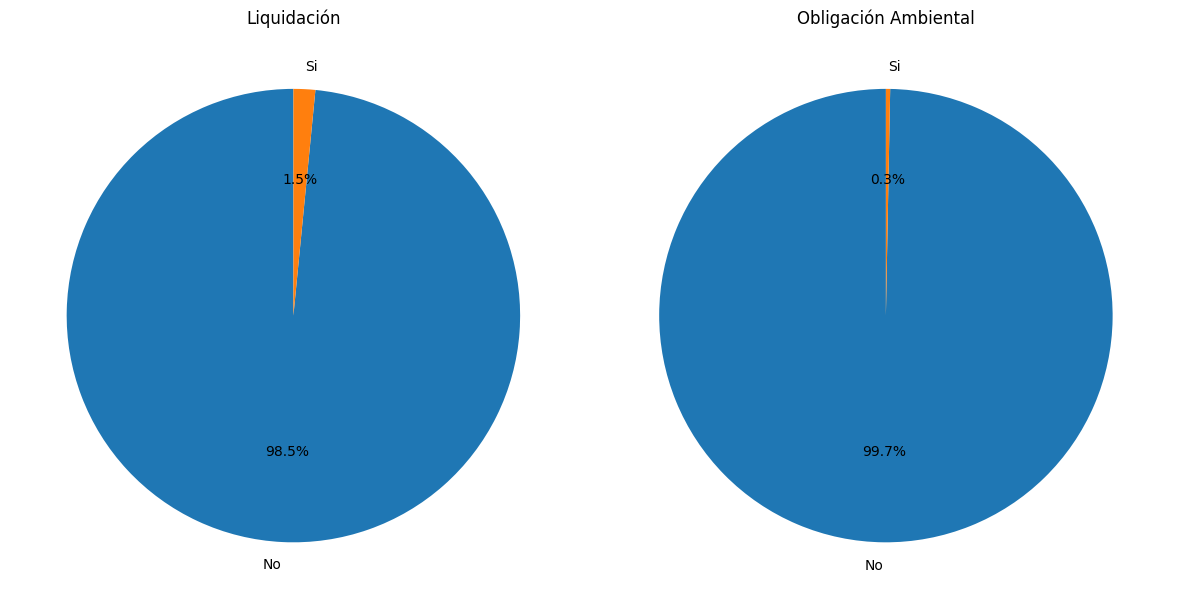

Tabla de Frecuencias:
    Liquidación  Obligación Ambiental
No         4894                  4956
Si           77                    15


In [22]:
frecuencias_liquidacion = Base_filtrada['liquidaci_n'].value_counts()
frecuencias_obligacion_ambiental = Base_filtrada['obligaci_n_ambiental'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(frecuencias_liquidacion, labels=frecuencias_liquidacion.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Liquidación')

ax2.pie(frecuencias_obligacion_ambiental, labels=frecuencias_obligacion_ambiental.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Obligación Ambiental')

plt.tight_layout()
plt.show()

tabla_frecuencias = pd.DataFrame({
    'Liquidación': frecuencias_liquidacion,
    'Obligación Ambiental': frecuencias_obligacion_ambiental
})

print("Tabla de Frecuencias:")
print(tabla_frecuencias)



Según los datos de las variables "Liquidación" y "Obligación Ambiental", se pueden extraer conclusiones importantes. La abrumadora mayoría de los contratos, representando aproximadamente el 98.44% en el caso de la liquidación y el 99.70% en el caso de la obligación ambiental, carecen de registros relacionados con estas dos áreas. Esto señala una baja incidencia de prácticas de liquidación formal de contratos y de inclusión de cláusulas ambientales en los contratos examinados. Estos hallazgos subrayan la necesidad de fortalecer la gestión ambiental y la formalización contractual en los procesos de contratación pública. Mejorar la inclusión de cláusulas y registros formales relacionados con obligaciones ambientales puede promover prácticas más sostenibles y responsables en la ejecución de contratos públicos, lo que a su vez fortalecerá la transparencia y la rendición de cuentas en estos procesos.

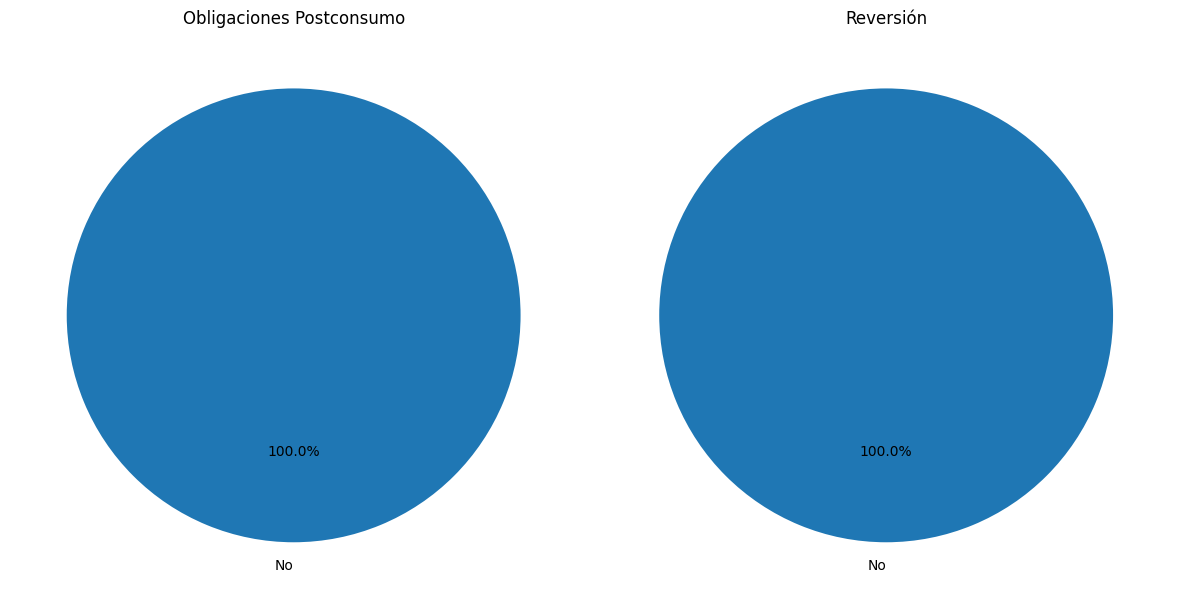

Tabla de Frecuencias:
    Obligaciones Postconsumo  Reversión
No                      4971       4971


In [23]:
frecuencias_obligaciones_postconsumo = Base_filtrada['obligaciones_postconsumo'].value_counts()
frecuencias_reversion = Base_filtrada['reversion'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(frecuencias_obligaciones_postconsumo, labels=frecuencias_obligaciones_postconsumo.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Obligaciones Postconsumo')

ax2.pie(frecuencias_reversion, labels=frecuencias_reversion.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Reversión')

plt.tight_layout()
plt.show()

tabla_frecuencias = pd.DataFrame({
    'Obligaciones Postconsumo': frecuencias_obligaciones_postconsumo,
    'Reversión': frecuencias_reversion
})

print("Tabla de Frecuencias:")
print(tabla_frecuencias)


Se puede concluir que la gran mayoría de los contratos, representados por aproximadamente el 100% en ambos casos, no tienen registros relacionados con obligaciones postconsumo ni reversión. Esta falta de registros sugiere una baja incidencia de prácticas formales relacionadas con la gestión de residuos postconsumo y la reversión de bienes en los contratos examinados

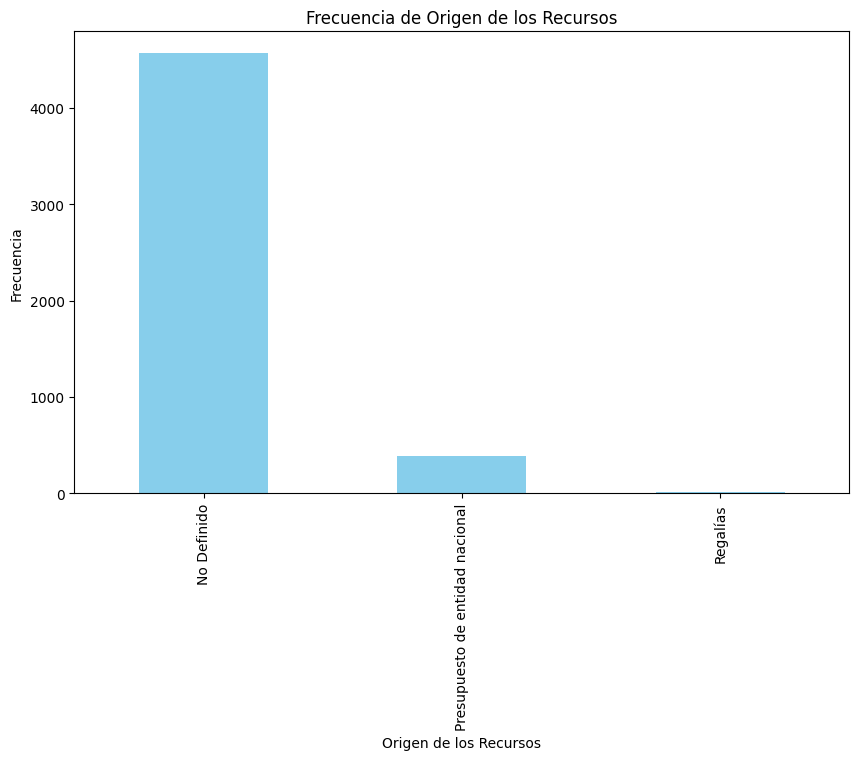

Origen de los Recursos:
                                 Frecuencia  Porcentaje
origen_de_los_recursos                                 
No Definido                            4565       91.83
Presupuesto de entidad nacional         390        7.85
Regalías                                 16        0.32


In [24]:
origen_recursos_data = Base_filtrada['origen_de_los_recursos'].value_counts()
origen_recursos_porcentajes = Base_filtrada['origen_de_los_recursos'].value_counts(normalize=True) * 100
origen_recursos_porcentajes = origen_recursos_porcentajes.round(2)

origen_recursos_df = pd.DataFrame({'Frecuencia': origen_recursos_data, 'Porcentaje': origen_recursos_porcentajes})


origen_recursos_data.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Frecuencia de Origen de los Recursos')
plt.xlabel('Origen de los Recursos')
plt.ylabel('Frecuencia')
plt.show()

print("Origen de los Recursos:")
print(origen_recursos_df)


La mayoría de los contratos, representando aproximadamente el 91.83%, no tienen un origen de recursos definido. Esto sugiere una falta de claridad en la asignación y seguimiento de los recursos financieros utilizados en estos contratos. Por otro lado, una proporción relativamente pequeña de contratos, alrededor del 7.85%, se financia a través del presupuesto de la entidad nacional, mientras que un porcentaje aún menor, aproximadamente el 0.32%, se financia mediante regalías. Estos hallazgos indican la necesidad de mejorar la transparencia y la trazabilidad en la asignación de recursos en los procesos de contratación pública. 

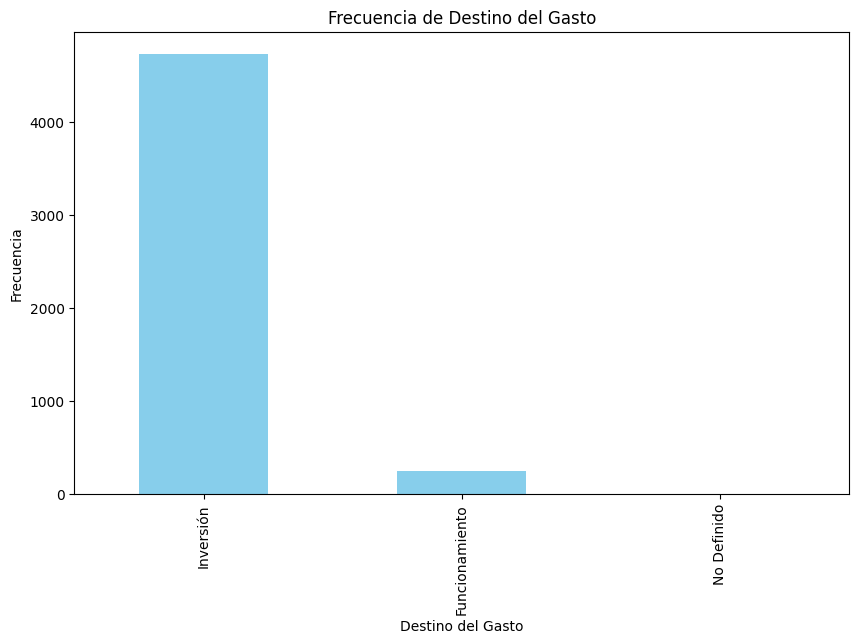

Destino del Gasto:
                Frecuencia  Porcentaje
destino_gasto                         
Inversión             4727       95.09
Funcionamiento         242        4.87
No Definido              2        0.04


In [25]:
destino_gasto_data = Base_filtrada['destino_gasto'].value_counts()
destino_gasto_porcentajes = Base_filtrada['destino_gasto'].value_counts(normalize=True) * 100
destino_gasto_porcentajes = destino_gasto_porcentajes.round(2)

destino_gasto_df = pd.DataFrame({'Frecuencia': destino_gasto_data, 'Porcentaje': destino_gasto_porcentajes})

destino_gasto_data.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Frecuencia de Destino del Gasto')
plt.xlabel('Destino del Gasto')
plt.ylabel('Frecuencia')
plt.show()

print("Destino del Gasto:")
print(destino_gasto_df)

La gran mayoría de los contratos, representando un 95.09%, están dirigidos hacia inversiones. Esto sugiere una priorización notable en la asignación de recursos hacia proyectos de inversión. Por otro lado, una proporción menor de contratos, alrededor del 4.87%, se destina a funcionamiento, lo que puede indicar una asignación de recursos para gastos operativos y de mantenimiento. Además, una mínima proporción de contratos, aproximadamente el 0.04%, no tienen un destino de gasto definido. Estos resultados subrayan la importancia de una asignación eficaz y transparente de recursos en los procesos de contratación pública. Asegurar una asignación adecuada de recursos según el destino planificado puede contribuir a una ejecución más eficiente de los contratos y al cumplimiento de los objetivos establecidos.

In [26]:
Base_filtrada['log_valor_contrato'] = np.log1p(Base_filtrada['valor_del_contrato'])

estadisticas_descriptivas = Base_filtrada['valor_del_contrato'].describe().to_frame().join(Base_filtrada['log_valor_contrato'].describe().to_frame(), lsuffix='_Original', rsuffix='_Logaritmo')
estadisticas_descriptivas.columns = ['Original', 'Logaritmo']
estadisticas_descriptivas = estadisticas_descriptivas.round(2)

pd.set_option('display.float_format', '{:.2f}'.format)

print(estadisticas_descriptivas)

             Original  Logaritmo
count         4971.00    4971.00
mean     139553644.79      17.74
std     1802276948.74       1.17
min              0.00       0.00
25%       33018000.00      17.31
50%       57750000.00      17.87
75%       83996666.50      18.25
max   114635217384.00      25.47


Se utilizó la transformación logarítmica en el gráfico del valor de los contratos con el fin de mejorar la visualización de la distribución de datos. Esta transformación es particularmente útil dado que la variable cuenta con una amplia gama de valores y tiene la presencia de valores extremos lo que afecta significativamente la interpretación en una escala lineal.

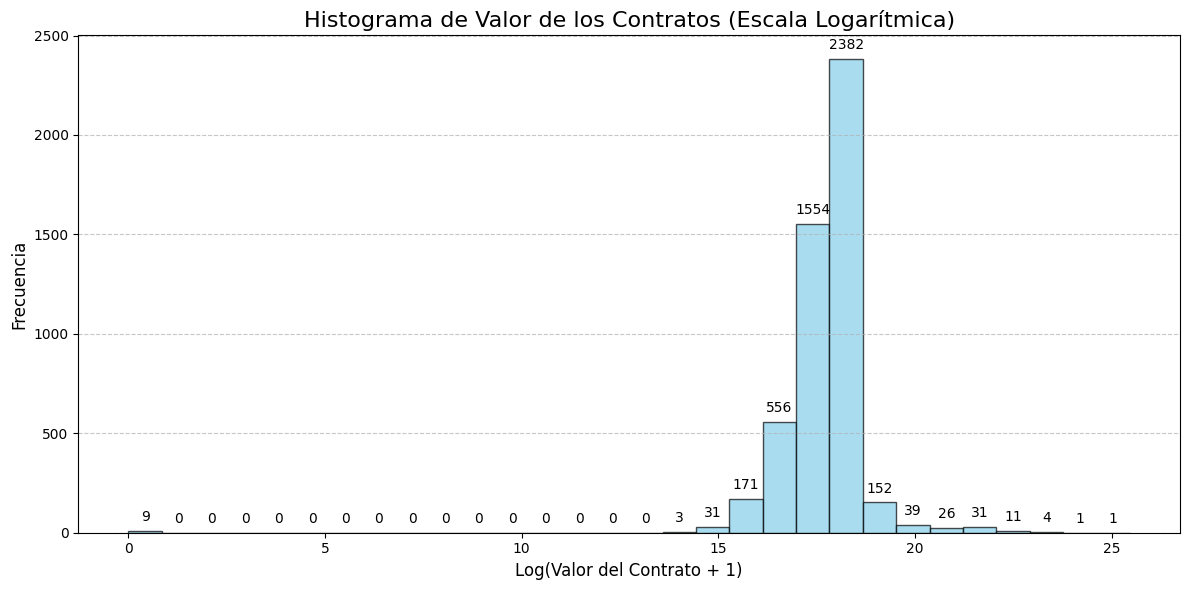

In [27]:

plt.figure(figsize=(12, 6))

# Histograma de Valor de los Contratos en escala logarítmica
plt.hist((Base_filtrada['log_valor_contrato']), bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Etiquetas y título
plt.title('Histograma de Valor de los Contratos (Escala Logarítmica)', fontsize=16)
plt.xlabel('Log(Valor del Contrato + 1)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Al observar el histograma después de aplicar la transformación logarítmica a la variable 'valor_del_contrato', se nota una notable aproximación a una distribución normal. Esta transformación logarítmica ha logrado mitigar la presencia de valores extremos, permitiendo que la distribución de los datos se asemeje más a una campana simétrica típica de una distribución normal. Este patrón es respaldado por los estadísticos descriptivos obtenidos.

Adicionalmente es importante resaltar la existencia de datos atípicos, estos estan distorsionando los datos dificultados su análisis, a la vez que muestran la gran diferencia en el valor de los contratos.

## Inicia el Cluster 

A continuación, se procede a preparar el DataFrame Base_Cluster. Se eliminan varias columnas que no serán utilizadas en el análisis de clustering, como 'id_contrato', 'obligaciones_postconsumo', 'reversion', 'proveedor_adjudicado', 'mes_anio', 'duracion_del_contrato' y 'log_valor_contrato'. Luego, se convierten las fechas ('fecha_de_firma', 'fecha_de_inicio_del_contrato' y 'fecha_de_fin_del_contrato') a periodos mensuales ('M'), extrayendo características de año y mes para cada fecha. Estas columnas de fecha originales son eliminadas del DataFrame Base_Cluster.

Posteriormente, se codifican las variables categóricas en variables dummy utilizando el método pd.get_dummies(), y se convierte la columna 'valor_del_contrato' a tipo float, eliminando cualquier carácter que no sea un dígito antes de realizar la conversión. 

In [28]:
identificadores = pd.DataFrame({
    'numero_fila': range(1, len(Base_filtrada) + 1),  # Números de fila de 1 al tamaño de Base_filtrada
    'id_contrato': Base_filtrada['id_contrato']  # Columna id_contrato de Base_filtrada
})


identificadores.to_csv('../../Datos/Raw/identificadores.csv', index=False)

In [29]:

Base_filtrada.to_csv('../../Datos/Raw/Base_filtrada.csv', index=True)
Base_Cluster = Base_filtrada.drop(['id_contrato','obligaciones_postconsumo', 'reversion', 'proveedor_adjudicado', 'mes_anio', 'duracion_del_contrato', 'log_valor_contrato'], axis=1)
Base_Cluster.columns

Index(['estado_contrato', 'tipo_de_contrato', 'modalidad_de_contratacion',
       'justificacion_modalidad_de', 'fecha_de_firma',
       'fecha_de_inicio_del_contrato', 'fecha_de_fin_del_contrato',
       'tipodocproveedor', 'es_grupo', 'es_pyme', 'habilita_pago_adelantado',
       'liquidaci_n', 'obligaci_n_ambiental', 'origen_de_los_recursos',
       'destino_gasto', 'valor_del_contrato'],
      dtype='object')

In [30]:
#cambio fechas 
Base_Cluster['fecha_de_firma'] = pd.to_datetime(Base_Cluster['fecha_de_firma']).dt.to_period('M')
Base_Cluster['fecha_de_inicio_del_contrato'] = pd.to_datetime(Base_Cluster['fecha_de_inicio_del_contrato']).dt.to_period('M')
Base_Cluster['fecha_de_fin_del_contrato'] = pd.to_datetime(Base_Cluster['fecha_de_fin_del_contrato']).dt.to_period('M')

In [31]:
#modificar variables para ser numericas 
#fechas  
Base_Cluster['año_firma'] = Base_Cluster['fecha_de_firma'].dt.year
Base_Cluster['mes_firma'] = Base_Cluster['fecha_de_firma'].dt.month

# Extraer características de fecha para 'fecha_de_inicio_del_contrato'
Base_Cluster['año_inicio'] = Base_Cluster['fecha_de_inicio_del_contrato'].dt.year
Base_Cluster['mes_inicio'] = Base_Cluster['fecha_de_inicio_del_contrato'].dt.month

# Extraer características de fecha para 'fecha_de_fin_del_contrato'
Base_Cluster['año_fin'] = Base_Cluster['fecha_de_fin_del_contrato'].dt.year
Base_Cluster['mes_fin'] = Base_Cluster['fecha_de_fin_del_contrato'].dt.month


#con fechas no hacer el cluster, si algo duracion
# Eliminar las columnas de fecha originales
Base_Cluster.drop(['fecha_de_firma', 'fecha_de_inicio_del_contrato', 'fecha_de_fin_del_contrato'], axis=1, inplace=True)

In [32]:
#Categoricas 
Base_Cluster = pd.get_dummies(Base_Cluster, columns=[col for col in categoricas if col in Base_Cluster.columns])
Base_Cluster['valor_del_contrato'] = Base_Cluster['valor_del_contrato'].astype(str).str.replace('[^0-9]', '').astype(float)

In [33]:
Base_Cluster

,valor_del_contrato,año_firma,mes_firma,año_inicio,mes_inicio,año_fin,mes_fin,estado_contrato_Activo,estado_contrato_Cerrado,estado_contrato_En ejecución,estado_contrato_Modificado,estado_contrato_Suspendido,estado_contrato_cedido,estado_contrato_terminado,tipo_de_contrato_Compraventa,tipo_de_contrato_Consultoría,tipo_de_contrato_Decreto 092 de 2017,tipo_de_contrato_Negocio fiduciario,tipo_de_contrato_No Especificado,tipo_de_contrato_Obra,tipo_de_contrato_Otro,tipo_de_contrato_Prestación de servicios,tipo_de_contrato_Seguros,tipo_de_contrato_Suministros,modalidad_de_contratacion_Concurso de méritos abierto,modalidad_de_contratacion_Contratación Directa (con ofertas),modalidad_de_contratacion_Contratación directa,modalidad_de_contratacion_Contratación régimen especial,modalidad_de_contratacion_Contratación régimen especial (con ofertas),modalidad_de_contratacion_Licitación pública,modalidad_de_contratacion_Mínima cuantía,modalidad_de_contratacion_No Definido,modalidad_de_contratacion_Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes,modalidad_de_contratacion_Selección Abreviada de Menor Cuantía,modalidad_de_contratacion_Selección abreviada subasta inversa,es_grupo_No,es_grupo_Si,es_pyme_No,es_pyme_Si,habilita_pago_adelantado_No,habilita_pago_adelantado_No Definido,justificacion_modalidad_de_Contratos de bienes y servicios sujetos a reserva,justificacion_modalidad_de_Contratos o convenios Interadministrativos (con valor),justificacion_modalidad_de_Contratos o convenios Interadministrativos (valor cero),justificacion_modalidad_de_Contratos para el desarrollo de actividades científicas y tecnológicas,justificacion_modalidad_de_Decreto 092 de 2017,justificacion_modalidad_de_Ejecución de trabajos artísticos,justificacion_modalidad_de_Ley 1150 de 2007,justificacion_modalidad_de_No Definido,justificacion_modalidad_de_No existe pluralidad de oferentes en el mercado,justificacion_modalidad_de_Prestación de servicios de salud,justificacion_modalidad_de_Presupuesto inferior al 10% de la menor cuantía,justificacion_modalidad_de_Presupuesto menor al 10% de la Menor Cuantía,justificacion_modalidad_de_Proceso de licitación pública declarado desierto,justificacion_modalidad_de_Regla aplicable,justificacion_modalidad_de_Servicios profesionales y apoyo a la gestión,justificacion_modalidad_de_Suministro de bienes y servicios de características técnicas uniformes y común utilización,justificacion_modalidad_de_Urgencia manifiesta,tipodocproveedor_Cédula de Ciudadanía,tipodocproveedor_Cédula de Extranjería,tipodocproveedor_No Definido,tipodocproveedor_Sin Descripcion,tipodocproveedor_Tarjeta de Identidad,es_grupo_No,es_grupo_Si,es_pyme_No,es_pyme_Si,habilita_pago_adelantado_No,habilita_pago_adelantado_No Definido,liquidaci_n_No,liquidaci_n_Si,obligaci_n_ambiental_No,obligaci_n_ambiental_Si,origen_de_los_recursos_No Definido,origen_de_los_recursos_Presupuesto de entidad nacional,origen_de_los_recursos_Regalías,destino_gasto_Funcionamiento,destino_gasto_Inversión,destino_gasto_No Definido
0,124000000.00,2023,2,2023,3,2024,7,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,False
1,117000000.00,2024,1,2024,1,2024,12,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,True,False
2,50784809.00,2021,7,2021,7,2021,11,False,False,True,False,False

Se inicia el proceso de cluster 

El código implementa el método del codo para identificar el número óptimo de clusters en un análisis de clustering utilizando el algoritmo K-Means. Calcula la inercia para diferentes números de clusters y visualiza estos valores en un gráfico. El punto en el que se observa un cambio significativo en la tasa de disminución de la inercia indica el número óptimo de clusters para el conjunto de datos, ya que equilibra la compacidad de los clusters con la simplicidad del modelo.

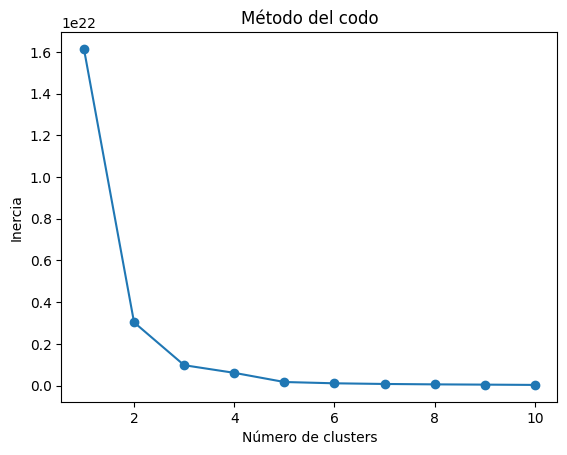

In [34]:
inercias = []

max_clusters = 10

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Base_Cluster)
    inercias.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), inercias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

Se escoge 5

El código realizará un análisis de clustering utilizando el algoritmo K-Means con el objetivo de agrupar los datos contenidos en Base_Cluster en un número específico de clusters, en este caso, 5. Una vez ajustado el modelo, asignará etiquetas de cluster a cada punto de datos y calculará los centroides de los clusters correspondientes.

Luego, empleará el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los datos a solo dos componentes principales. Esta transformación permitirá visualizar la distribución de los datos en un gráfico bidimensional, donde cada punto representará una observación y su color indicará el cluster al que pertenece. Esta representación gráfica facilitará la identificación de patrones y la comprensión de la estructura de los clusters obtenidos.

In [35]:
numero_clusters = 5
#modelo
kmeans = KMeans(n_clusters=numero_clusters, random_state=2009)

kmeans.fit(Base_Cluster)

etiquetas_clusters = kmeans.labels_

centroides = kmeans.cluster_centers_

In [36]:
pca = PCA(n_components=2)  
componentes_principales = pca.fit_transform(Base_Cluster)


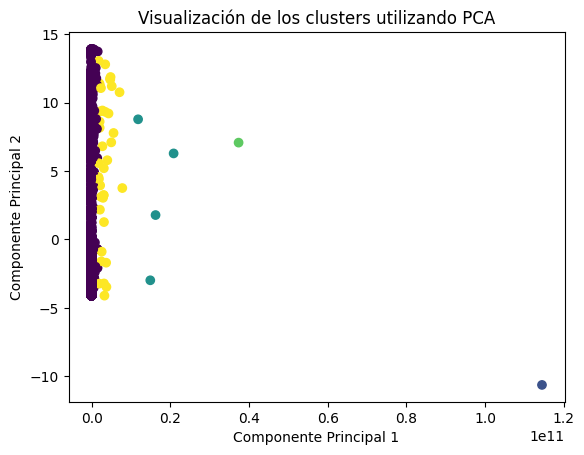

In [37]:
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1], c=etiquetas_clusters, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de los clusters utilizando PCA')
plt.show()

Se evidencia bastante dispercion en los datos

In [38]:
inercia = kmeans.inertia_
print("Inercia:", inercia)


Inercia: 1.7082439753261564e+20


El modelo de clustering presenta una inercia de 1.708243975326156e+20, lo que indica una alta dispersión de los datos alrededor de los centroides de los clusters. Esta magnitud de inercia sugiere una posible falta de cohesión en los clusters identificados, lo que podría dificultar la interpretación y utilidad de los resultados obtenidos, por lo se probara estandarizando el valor del contrato, el cual cuenta con mucha dispercion y outliers.

In [39]:
scaler = StandardScaler()
Base_Cluster['valor_del_contrato_estandarizado'] = scaler.fit_transform(Base_Cluster[['valor_del_contrato']])
Base_Cluster_Est= Base_Cluster.drop(['valor_del_contrato'], axis=1)
Base_Cluster_Est.to_csv('../../Datos/Raw/BaseDatos_Cluster.csv')

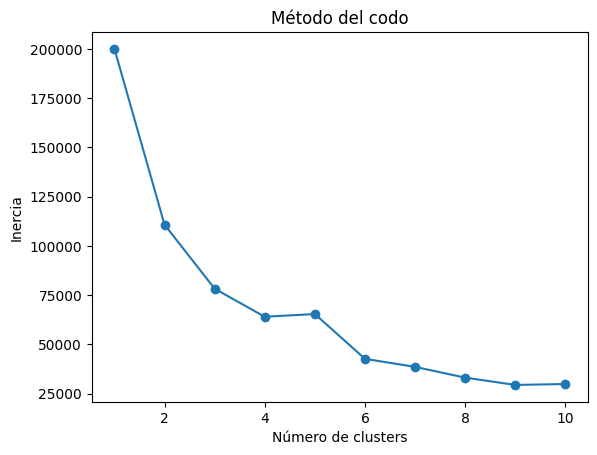

In [40]:
inercias = []


max_clusters = 10


for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Base_Cluster_Est)
    inercias.append(kmeans.inertia_)

# Grafica la curva de la inercia
plt.plot(range(1, max_clusters + 1), inercias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

Al analisar el grafico concluimos usar 6 cluster 

In [41]:
numero_clusters = 6
#modelo
kmeans = KMeans(n_clusters=numero_clusters, random_state=2009)

kmeans.fit(Base_Cluster_Est)

etiquetas_clusters = kmeans.labels_

centroides = kmeans.cluster_centers_

In [42]:
numero_clusters = 6
kmeans = KMeans(n_clusters=numero_clusters, random_state=42)
clusters = kmeans.fit_predict(Base_Cluster_Est)

# Añadir una nueva columna al DataFrame con el número de cluster para cada fila
Base_Cluster_Est['cluster'] = clusters




In [43]:
pca = PCA(n_components=2)  
componentes_principales = pca.fit_transform(Base_Cluster_Est)

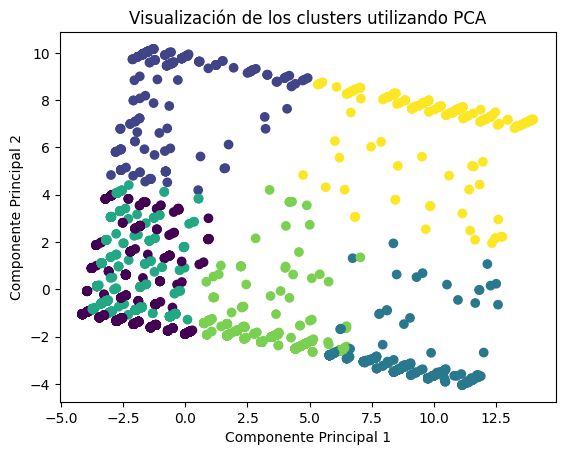

In [44]:
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1], c=etiquetas_clusters, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de los clusters utilizando PCA')
plt.show()

In [45]:
inercia = kmeans.inertia_
print("Inercia:", inercia)

Inercia: 42626.64145598632


Con una inercia de 42626.64145598632, se observa una reducción significativa en comparación con la inercia previamente mencionada. Esto sugiere que al estandarizar el salario, se ha logrado una mayor cohesión de los datos alrededor de los centroides de los clusters. Gráficamente, al observar los resultados, se aprecia que los datos están más agrupados y separados de manera más clara en el espacio de características. Esta reducción en la inercia y la mejora en la separación de los clusters indican que el modelo ha logrado capturar mejor la estructura subyacente de los datos y proporcionar agrupaciones más significativas. En consecuencia, se puede tener mayor confianza en la interpretación y utilidad de los clusters identificados.

In [46]:
cluster_means = Base_Cluster_Est.groupby(etiquetas_clusters).mean()
print(cluster_means)

   año_firma  mes_firma  año_inicio  mes_inicio  año_fin  mes_fin  \
0    2023.58       1.95     2023.58        2.04  2023.59    11.49   
1    2021.82       1.61     2021.82        1.72  2022.64     1.88   
2    2022.09       9.64     2022.09        9.71  2022.18    11.88   
3    2021.26       1.42     2021.26        1.44  2021.26    11.49   
4    2021.49       6.01     2021.49        6.04  2021.52    11.75   
5    2021.48       9.67     2021.48        9.81  2022.55     1.54   

   estado_contrato_Activo  estado_contrato_Cerrado  \
0                    0.00                     0.00   
1                    0.01                     0.03   
2                    0.00                     0.02   
3                    0.09                     0.06   
4                    0.02                     0.08   
5                    0.00                     0.04   

   estado_contrato_En ejecución  estado_contrato_Modificado  \
0                          0.61                        0.34   
1          

Los clusters identificados representan grupos distintos de contratos con características y propiedades diferentes. Analizar los atributos promedio de cada cluster proporciona una comprensión más profunda de las distintas dinámicas y patrones presentes en los datos de contratación.

In [48]:
importancia_caracteristicas = pd.DataFrame(centroides, columns=Base_Cluster_Est.columns[:-1])
print(importancia_caracteristicas)

   año_firma  mes_firma  año_inicio  mes_inicio  año_fin  mes_fin  \
0    2023.58       1.95     2023.58        2.04  2023.59    11.49   
1    2021.82       1.61     2021.82        1.72  2022.64     1.88   
2    2022.09       9.64     2022.09        9.71  2022.18    11.88   
3    2021.26       1.42     2021.26        1.44  2021.26    11.49   
4    2021.49       6.01     2021.49        6.04  2021.52    11.75   
5    2021.48       9.67     2021.48        9.81  2022.55     1.54   

   estado_contrato_Activo  estado_contrato_Cerrado  \
0                    0.00                     0.00   
1                    0.01                     0.03   
2                   -0.00                     0.02   
3                    0.09                     0.06   
4                    0.02                     0.08   
5                    0.00                     0.04   

   estado_contrato_En ejecución  estado_contrato_Modificado  \
0                          0.61                        0.34   
1          

El código proporciona información sobre las características promedio de cada cluster después de realizar un análisis de clustering utilizando el algoritmo K-Means. Esta información es útil para entender las diferencias entre los grupos de datos identificados por el algoritmo de clustering.

a continuacion se mostrara, la representación tabular de los centroides de los clusters, lo que permite examinar las características promedio de cada cluster en términos de las variables del conjunto de datos.

In [51]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

centroidesDT = pd.DataFrame(centroides, columns=Base_Cluster_Est.columns[:-1])

print(centroidesDT)

   año_firma  mes_firma  año_inicio  mes_inicio  año_fin  mes_fin  \
0    2023.58       1.95     2023.58        2.04  2023.59    11.49   
1    2021.82       1.61     2021.82        1.72  2022.64     1.88   
2    2022.09       9.64     2022.09        9.71  2022.18    11.88   
3    2021.26       1.42     2021.26        1.44  2021.26    11.49   
4    2021.49       6.01     2021.49        6.04  2021.52    11.75   
5    2021.48       9.67     2021.48        9.81  2022.55     1.54   

   estado_contrato_Activo  estado_contrato_Cerrado  \
0                    0.00                     0.00   
1                    0.01                     0.03   
2                   -0.00                     0.02   
3                    0.09                     0.06   
4                    0.02                     0.08   
5                    0.00                     0.04   

   estado_contrato_En ejecución  estado_contrato_Modificado  \
0                          0.61                        0.34   
1          

Se va a calcular estadísticas descriptivas como el conteo, la media, la desviación estándar, los valores mínimos, los percentiles 25, 50 (mediana), 75 y máximos para cada variable en cada cluster.

In [57]:
perfil_caracteristicas = Base_Cluster_Est.groupby(etiquetas_clusters).describe()
print(perfil_caracteristicas)

  año_firma                                                      mes_firma  \
      count    mean  std     min     25%     50%     75%     max     count   
0   1847.00 2023.58 0.49 2023.00 2023.00 2024.00 2024.00 2024.00   1847.00   
1    347.00 2021.82 1.07 2020.00 2021.00 2022.00 2022.00 2024.00    347.00   
2    607.00 2022.09 1.10 2020.00 2021.00 2023.00 2023.00 2023.00    607.00   
3   1429.00 2021.26 0.83 2020.00 2021.00 2022.00 2022.00 2022.00   1429.00   
4    510.00 2021.49 1.18 2020.00 2021.00 2021.00 2023.00 2023.00    510.00   
5    231.00 2021.48 1.07 2020.00 2021.00 2021.00 2022.00 2023.00    231.00   

                                        año_inicio                       \
  mean  std  min  25%   50%   75%   max      count    mean  std     min   
0 1.95 0.81 1.00 1.00  2.00  2.00  4.00    1847.00 2023.58 0.49 2023.00   
1 1.61 1.07 1.00 1.00  1.00  2.00  5.00     347.00 2021.82 1.07 2020.00   
2 9.64 1.20 8.00 9.00 10.00 11.00 12.00     607.00 2022.09 1.10 2020.00   


Los valores p obtenidos a partir del análisis de varianza (ANOVA) indican la significancia estadística de cada característica en relación con los clusters generados. 

In [59]:
from scipy.stats import f_oneway

for col in Base_Cluster_Est.columns:
    if col != 'id_contrato':
        cluster_valores = [Base_Cluster_Est[col][etiquetas_clusters == i] for i in range(numero_clusters)]
        p_valor = f_oneway(*cluster_valores).pvalue
        print(f'Valor p para ANOVA de {col}: {p_valor}')

Valor p para ANOVA de año_firma: 0.0
Valor p para ANOVA de mes_firma: 0.0
Valor p para ANOVA de año_inicio: 0.0
Valor p para ANOVA de mes_inicio: 0.0
Valor p para ANOVA de año_fin: 0.0
Valor p para ANOVA de mes_fin: 0.0
Valor p para ANOVA de estado_contrato_Activo: 1.4115691686382768e-62
Valor p para ANOVA de estado_contrato_Cerrado: 6.289710812050299e-29
Valor p para ANOVA de estado_contrato_En ejecución: 1.0828299159852627e-64
Valor p para ANOVA de estado_contrato_Modificado: 2.3822159649476167e-15
Valor p para ANOVA de estado_contrato_Suspendido: 0.07216045342842126
Valor p para ANOVA de estado_contrato_cedido: 0.10068170850914433
Valor p para ANOVA de estado_contrato_terminado: 8.636753916112144e-16
Valor p para ANOVA de tipo_de_contrato_Compraventa: 1.2944440453163223e-11
Valor p para ANOVA de tipo_de_contrato_Consultoría: 9.874677593984286e-05
Valor p para ANOVA de tipo_de_contrato_Decreto 092 de 2017: 5.6210811217803366e-05
Valor p para ANOVA de tipo_de_contrato_Negocio fiduciar

Las características temporales, como 'año_firma', 'mes_firma', 'año_inicio', 'mes_inicio', 'año_fin' y 'mes_fin', exhiben valores p extremadamente bajos, indicando que estas variables tienen una contribución sustancial en la diferenciación de los clusters. Esto sugiere que el tiempo de firma, inicio y fin de los contratos desempeña un papel crucial en la segmentación de los datos en clusters.

Asimismo, características relacionadas con el estado del contrato, tipo de contrato, modalidad de contratación y destino del gasto también muestran valores p muy bajos, lo que sugiere que estas variables son relevantes para la formación de clusters y contribuyen significativamente a la diferenciación entre los grupos.

Por otro lado, características como 'estado_contrato_Suspendido', 'estado_contrato_cedido' y 'destino_gasto_No Definido' presentan valores p más altos, lo que indica que podrían tener una influencia menor en la segmentación de los datos en clusters en comparación con otras características. Esto sugiere que estas variables pueden no contribuir tanto como otras a la diferenciación entre los grupos.

En comparación con los resultados de los estadísticos descriptivos, se observa que algunas variables tienen una contribución más significativa a la segmentación en clusters que otras. Esto resalta la importancia de considerar cuidadosamente las características que se utilizan para la segmentación y comprender su impacto en la formación de grupos en el conjunto de datos.



## Conclusiones

Considerando el análisis detallado de la base de datos de contratación pública del Ministerio de Ambiente y Desarrollo Sostenible entre los años 2020 y 2023, se observa una serie de patrones y tendencias que proporcionan una perspectiva rica sobre las prácticas contractuales durante este período.

En primer lugar, la preeminencia de la "Contratación directa" destaca como una estrategia eficaz en la gestión de recursos y tiempos, sugiriendo una optimización en la ejecución de proyectos. Este enfoque puede indicar la capacidad del Ministerio para tomar decisiones ágiles y directas en la contratación, lo que resulta fundamental para la eficiencia en la implementación de sus iniciativas.

La frecuencia destacada de la categoría "Prestación de servicios" resalta su importancia central en las actividades ministeriales. Este énfasis puede sugerir la externalización de funciones especializadas, lo que podría derivarse de la necesidad de acceso a conocimientos especializados o recursos específicos para alcanzar los objetivos del Ministerio.

Al explorar las justificaciones asociadas a las modalidades de contratación, se identifica una preferencia por servicios profesionales y acuerdos interadministrativos. Esta elección estratégica proporciona una visión más detallada de las necesidades específicas del Ministerio y cómo busca satisfacerlas mediante la colaboración con proveedores externos, posiblemente para obtener experiencia técnica o recursos especializados.

La variabilidad temporal en la cantidad de contratos revela adaptaciones a condiciones económicas y de salud pública a lo largo del tiempo. Esta flexibilidad destaca la capacidad del Ministerio para ajustar sus estrategias de contratación en respuesta a circunstancias cambiantes, enfatizando la importancia de considerar el contexto temporal al interpretar los patrones contractuales.

En términos de duración de los contratos, la preferencia por acuerdos de mediano a largo plazo sugiere una visión estratégica que busca estabilidad y compromiso continuo con los proveedores. La identificación de diversos proveedores, tanto del propio Ministerio como de entidades especializadas, revela una red de relaciones que contribuye a la implementación exitosa de proyectos, enfatizando la importancia de establecer colaboraciones sólidas.

El análisis de las condiciones de "es_grupo" y "es_pyme" destaca la predominancia de entidades individuales no consideradas grupos y una representación limitada de pequeñas y medianas empresas en la adjudicación de contratos. Estos hallazgos indican posibles desafíos para la participación de empresas más pequeñas en las oportunidades de contratación pública y subrayan áreas potenciales para la promoción de la inclusión de este sector en futuros procesos de contratación. En este sentido, podría ser beneficioso explorar estrategias para fomentar la participación de PYMEs, contribuyendo así a una mayor diversidad y competencia en los procesos de contratación del Ministerio.

La mayoría de los contratos se destinan a inversiones, indicando una clara priorización en la asignación de recursos para proyectos de este tipo. Sin embargo, una proporción menor se destina a gastos operativos y de mantenimiento, y un pequeño porcentaje carece de un destino de gasto definido. En cuanto al origen de los recursos, la mayoría de los contratos carecen de un origen definido, lo que destaca la necesidad de mejorar la transparencia en la asignación de recursos en los procesos de contratación pública.

Respecto a las obligaciones postconsumo, reversión de bienes y obligaciones ambientales, la mayoría de los contratos carecen de registros formales en estas áreas, lo que sugiere una baja incidencia de prácticas en gestión de residuos y formalización contractual. En relación con los pagos adelantados, la mayoría de los contratos no habilitan este tipo de pago, mostrando una tendencia hacia contratos sin esta modalidad.

La investigación ha revelado una serie de hallazgos significativos sobre la segmentación de contratos públicos utilizando técnicas de clustering. Se ha demostrado que ciertas características, como las temporales (año y mes de firma, inicio y fin del contrato) y aquellas relacionadas con el estado, tipo y destino del gasto, juegan un papel crucial en la formación de clusters. Estas variables han mostrado una contribución sustancial a la diferenciación entre los grupos identificados.

Además, se encontró que algunas variables tienen menos influencia en la segmentación de los datos en clusters, lo que sugiere que su inclusión en futuros análisis puede requerir una evaluación más cuidadosa de su relevancia y contribución al proceso de clustering.

Este estudio proporciona una base sólida para futuras investigaciones en el campo de la contratación pública y la gestión de contratos, ya que deja establecidos clusters que pueden servir como punto de partida para análisis más detallados sobre patrones de contratación, identificación de grupos de contratos similares y evaluación de riesgos y oportunidades asociadas con diferentes tipos de contratos. La capacidad de segmentar contratos públicos en clusters proporciona una herramienta valiosa para la toma de decisiones informadas y la optimización de procesos en el ámbito de la contratación gubernamental.